In [1]:
!pip install gymnasium

In [2]:
import gymnasium as gym
import numpy as np
import random
import time

In [3]:
env = gym.make('FrozenLake-v1', render_mode="rgb_array")

In [4]:
# Initialize Q-value table randomly
q_table = np.zeros((env.observation_space.n, env.action_space.n))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [5]:
# Hyperparameters
gamma = 0.9
learning_rate = 0.4
max_epsilon = 1.0
min_epsilon = 0.001
epsilon_decay_rate = 0.001

num_episodes = 50000
num_steps_per_episode = 100 # Each environment can have a different episode length

In [6]:
def q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []
    for episode in range(num_episodes):
        state, _ = env.reset()

        reward_episode = 0.0
        done = False
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate*episode)
        for step in range(num_steps_per_episode):
            exploration = random.uniform(0,1)
            if exploration < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state, :])

            next_state, reward, terminated, truncated, _ = env.step(action)
            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * np.max(q_table[next_state,:]))

            reward_episode += reward
            state = next_state

            if terminated or truncated:
                done = True

            if done:
                break
        rewards_all.append(reward_episode)
    print(f'Episode {episode} finished')
    return q_table, rewards_all

In [7]:
q_table, rewards_all = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 49999 finished


In [8]:
q_table

array([[1.48430160e-02, 1.50524368e-02, 9.77646110e-02, 1.36279181e-02],
       [7.60955812e-03, 9.89973169e-03, 4.89600306e-03, 7.46404220e-02],
       [6.02371037e-02, 8.51488504e-03, 8.12256917e-03, 8.01774248e-03],
       [1.92472032e-03, 4.21515371e-03, 2.94287949e-03, 4.28251596e-02],
       [1.46975050e-01, 7.66662096e-03, 3.55023866e-02, 1.66211576e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.40499201e-01, 5.15920730e-04, 4.69043443e-04, 6.16951292e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.73667963e-02, 2.25965254e-02, 1.44318899e-02, 2.40285165e-01],
       [3.66261458e-02, 3.60384417e-01, 3.07330234e-02, 6.27768650e-02],
       [3.49307891e-01, 4.62819739e-02, 1.90685675e-02, 2.11156096e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.15656868e-01, 1.14864129e-01, 4.88878035e

In [9]:
sum(rewards_all)

25280.0

In [10]:
sum(rewards_all[0:1000])

36.0

In [11]:
sum(rewards_all[1000:2000])

116.0

In [12]:
sum(rewards_all[2000:3000])

199.0

In [13]:
sum(rewards_all[9000:10000])

611.0

In [14]:
sum(rewards_all[19000:20000])

440.0

In [15]:
from IPython import display as ipythondisplay
import matplotlib.pyplot as plt

In [16]:
def play(env, q_table, render=False):
    state, _ = env.reset()
    total_reward = 0
    steps = 0
    done = False

    if render:
        plt.axis('off')

    while not done:
        action = np.argmax(q_table[state, :])
        next_state, reward, terminated, truncated, _ = env.step(action)
        total_reward += reward
        steps += 1
        if render:
            print(f"{state} --> {next_state}")
            time.sleep(0.5)
            # screen = env.render(mode='rgb_array')
            screen = env.render()
            plt.imshow(screen)
            ipythondisplay.clear_output(wait=True)
            ipythondisplay.display(plt.gcf())
            time.sleep(0.1)

        if terminated or truncated:
            done = True

        state = next_state

    return (total_reward, steps)

In [17]:
def play_multiple_times(env, q_table, max_episodes):
    success = 0
    list_of_steps = []
    for i in range(max_episodes):
        total_reward, steps = play(env, q_table)

        if total_reward > 0:
            success += 1
            list_of_steps.append(steps)

    # print(f'Number of successes: {success}/{max_episodes}')
    # print(f'Average number of steps: {np.mean(list_of_steps)}')
    return (success, np.mean(list_of_steps))

In [18]:
play_multiple_times(env, q_table, 1000)

(530, 31.245283018867923)

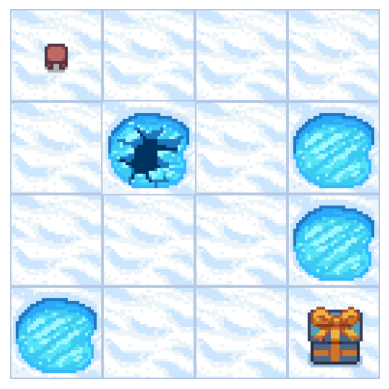

(0.0, 11)

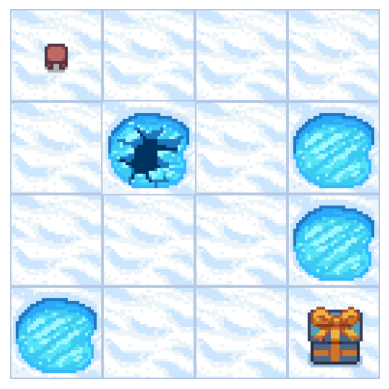

In [19]:
play(env, q_table, render=True)

In [20]:
def sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []
    for episode in range(num_episodes):
        state, _ = env.reset()
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate*episode)
        exploration = random.uniform(0,1)
        if exploration < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state, :])
        reward_episode = 0.0
        done = False
        for step in range(num_steps_per_episode):
            next_state, reward, terminated, truncated, _ = env.step(action)
            exploration = random.uniform(0,1)
            if exploration < epsilon:
                next_action = env.action_space.sample()
            else:
                next_action = np.argmax(q_table[next_state, :])

            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * q_table[next_state, next_action])

            reward_episode += reward
            state = next_state
            action = next_action
            if terminated or truncated:
                done = True
            if done:
                break
        rewards_all.append(reward_episode)
    print(f'Episode {episode} finished')
    return q_table, rewards_all

In [21]:
q_table_sarsa, rewards_all_sarsa = sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 49999 finished


In [22]:
q_table_sarsa

array([[0.01069486, 0.01102262, 0.03434346, 0.01020541],
       [0.01995932, 0.00326062, 0.00883545, 0.05200491],
       [0.05393057, 0.00535613, 0.00522315, 0.02113835],
       [0.00381521, 0.00206418, 0.00198469, 0.01755742],
       [0.03810202, 0.01499452, 0.01714774, 0.02659579],
       [0.        , 0.        , 0.        , 0.        ],
       [0.00144301, 0.00131933, 0.11416606, 0.00181239],
       [0.        , 0.        , 0.        , 0.        ],
       [0.01714207, 0.02785592, 0.00916707, 0.10450461],
       [0.01062485, 0.20956808, 0.06083139, 0.03416915],
       [0.47461718, 0.06678776, 0.02753154, 0.00718907],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.08803615, 0.1115992 , 0.51087631, 0.07873782],
       [0.14084981, 0.85994758, 0.15573133, 0.1515093 ],
       [0.        , 0.        , 0.        , 0.        ]])

In [23]:
sum(rewards_all_sarsa)

24748.0

In [24]:
sum(rewards_all_sarsa[0:1000])

25.0

In [25]:
sum(rewards_all_sarsa[1000:2000])

84.0

In [26]:
sum(rewards_all_sarsa[2000:3000])

180.0

In [27]:
sum(rewards_all_sarsa[9000:10000])

556.0

In [28]:
sum(rewards_all_sarsa[19000:20000])

561.0

In [29]:
play_multiple_times(env, q_table_sarsa, 1000)

(518, 30.104247104247104)

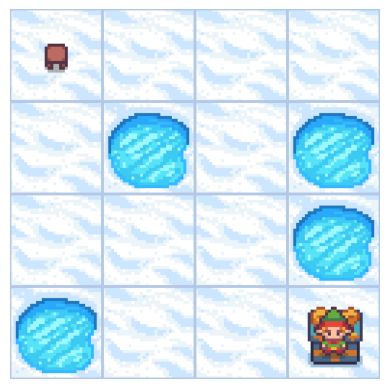

(1.0, 29)

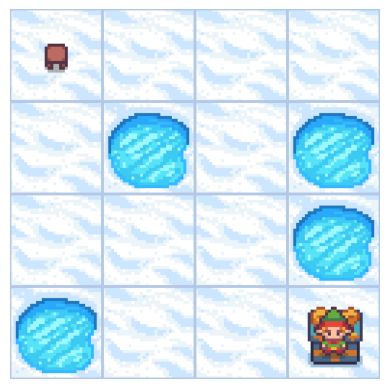

In [30]:
play(env, q_table_sarsa, render=True)

# Experiment

## Training

In [31]:
num_play_times_for_FrozenLake = 100000
num_play_times_for_Taxi = 200000

In [32]:
env_1 = gym.make('FrozenLake-v1', render_mode="rgb_array")
env_2 = gym.make('FrozenLake8x8-v1', render_mode="rgb_array")
env_3 = gym.make('Taxi-v3', render_mode = "rgb_array")

In [33]:
q_table_1_qlearning = np.zeros((env_1.observation_space.n, env_1.action_space.n))
q_table_1_sarsa = np.zeros((env_1.observation_space.n, env_1.action_space.n))

q_table_2_qlearning = np.zeros((env_2.observation_space.n, env_2.action_space.n))
q_table_2_sarsa = np.zeros((env_2.observation_space.n, env_2.action_space.n))

q_table_3_qlearning = np.zeros((env_3.observation_space.n, env_3.action_space.n))
q_table_3_sarsa = np.zeros((env_3.observation_space.n, env_3.action_space.n))

### Experiment with FrozenLake-v1

#### Configuration

In [34]:
gamma = 0.9
learning_rate_frozenlake4x4 = 0.65
max_epsilon = 1.0
min_epsilon = 0.001
epsilon_decay_rate__frozenlake4x4 = 0.0005

num_episodes_1 = 300000
num_steps_per_episode_frozen_lake_4x4 = 100

#### Execution

In [35]:
q_table_1_qlearning, total_reward_1_qlearning = q_learning(env_1, num_episodes_1, num_steps_per_episode_frozen_lake_4x4, learning_rate_frozenlake4x4, gamma, max_epsilon, min_epsilon, epsilon_decay_rate__frozenlake4x4)

Episode 299999 finished


In [36]:
q_table_1_sarsa, total_reward_1_sarsa = sarsa(env_1, num_episodes_1, num_steps_per_episode_frozen_lake_4x4, learning_rate_frozenlake4x4, gamma, max_epsilon, min_epsilon, epsilon_decay_rate__frozenlake4x4)

Episode 299999 finished


In [37]:
q_table_1_qlearning

array([[1.65657707e-01, 1.31060024e-02, 5.21301876e-02, 1.26555781e-02],
       [1.40051717e-03, 2.81695279e-05, 4.65570719e-04, 7.36882539e-02],
       [1.09249217e-03, 1.14885940e-02, 1.11185668e-03, 5.92148300e-04],
       [2.55996718e-03, 1.47925056e-03, 7.16443029e-05, 1.86489357e-02],
       [1.77548279e-01, 1.16079655e-03, 3.09574255e-03, 2.36384645e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.87377842e-03, 6.43642664e-03, 1.22631578e-04, 3.32605395e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.32393985e-02, 4.21283361e-03, 1.08707524e-02, 2.99263532e-01],
       [5.55498822e-03, 2.82006060e-01, 3.44907881e-04, 1.37741468e-01],
       [6.00592802e-01, 8.12269314e-04, 2.51965915e-03, 5.49860518e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.57854311e-02, 2.77355496e-02, 4.35799845e

In [38]:
q_table_1_sarsa

array([[7.19096255e-02, 7.59888046e-03, 8.57117389e-03, 7.32180050e-03],
       [2.79956230e-04, 1.50604318e-03, 6.40606918e-04, 1.70831376e-01],
       [8.92721122e-02, 1.24196068e-03, 5.16844781e-03, 1.01800048e-03],
       [2.08484971e-04, 3.85721551e-04, 3.05555709e-05, 5.17842813e-03],
       [7.91664867e-02, 6.86061602e-03, 5.02605502e-03, 6.81195420e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.02759797e-03, 4.93035762e-06, 1.39536794e-01, 2.38971611e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.13957488e-03, 1.98496314e-02, 2.32544725e-02, 5.15795555e-02],
       [1.18622643e-03, 2.95996049e-02, 7.09933265e-02, 1.87058886e-03],
       [6.32663227e-01, 5.00923150e-03, 3.82610841e-03, 2.66373145e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.38507870e-01, 7.33144302e-02, 2.32060868e

In [39]:
print(sum(total_reward_1_qlearning))
print(sum(total_reward_1_qlearning[0:1000]))
print(sum(total_reward_1_qlearning[1000:2000]))
print(sum(total_reward_1_qlearning[2000:3000]))
print(sum(total_reward_1_qlearning[9000:10000]))
print(sum(total_reward_1_qlearning[19000:20000]))
print(sum(total_reward_1_qlearning[20000:100000]))
print(sum(total_reward_1_qlearning[100000:200000]))
print(sum(total_reward_1_qlearning[200000:300000]))

168204.0
18.0
50.0
63.0
397.0
532.0
45800.0
57329.0
57496.0


In [40]:
print(sum(total_reward_1_sarsa))
print(sum(total_reward_1_sarsa[0:1000]))
print(sum(total_reward_1_sarsa[1000:2000]))
print(sum(total_reward_1_sarsa[2000:3000]))
print(sum(total_reward_1_sarsa[9000:10000]))
print(sum(total_reward_1_sarsa[19000:20000]))
print(sum(total_reward_1_sarsa[20000:100000]))
print(sum(total_reward_1_sarsa[100000:200000]))
print(sum(total_reward_1_sarsa[200000:300000]))

169294.0
18.0
31.0
34.0
400.0
603.0
46007.0
57125.0
59051.0


In [41]:
print(sum(total_reward_1_qlearning) / num_episodes_1)
print(sum(total_reward_1_qlearning[0:1000]) / 1000)
print(sum(total_reward_1_qlearning[1000:2000]) / 1000)
print(sum(total_reward_1_qlearning[2000:3000]) / 1000)
print(sum(total_reward_1_qlearning[9000:10000]) / 1000)
print(sum(total_reward_1_qlearning[19000:20000]) / 1000)
print(sum(total_reward_1_qlearning[20000:100000]) / 80000)
print(sum(total_reward_1_qlearning[100000:200000]) / 100000)
print(sum(total_reward_1_qlearning[200000:300000]) / 100000)

0.56068
0.018
0.05
0.063
0.397
0.532
0.5725
0.57329
0.57496


In [42]:
print(sum(total_reward_1_sarsa) / num_episodes_1)
print(sum(total_reward_1_sarsa[0:1000]) / 1000)
print(sum(total_reward_1_sarsa[1000:2000]) / 1000)
print(sum(total_reward_1_sarsa[2000:3000]) / 1000)
print(sum(total_reward_1_sarsa[9000:10000]) / 1000)
print(sum(total_reward_1_sarsa[19000:20000]) / 1000)
print(sum(total_reward_1_sarsa[20000:100000]) / 80000)
print(sum(total_reward_1_sarsa[100000:200000]) / 100000)
print(sum(total_reward_1_sarsa[200000:300000]) / 100000)

0.5643133333333333
0.018
0.031
0.034
0.4
0.603
0.5750875
0.57125
0.59051


In [43]:
successes_1_ql = []
successes_1_sa = []
for i in range(5):
  print("Trial number ", i + 1)
  ql_number_of_successes, ql_mean_of_steps = play_multiple_times(env_1, q_table_1_qlearning, num_play_times_for_FrozenLake)
  sa_number_of_successes, sa_mean_of_steps = play_multiple_times(env_1, q_table_1_sarsa, num_play_times_for_FrozenLake)
  print(f'Number of successes of using Q-learning algorithm in map FrozenLake-v1 : {ql_number_of_successes}/{num_play_times_for_FrozenLake}, Average steps: {ql_mean_of_steps} steps')
  print(f'Number of successes of using Sarsa algorithm in map FrozenLake-v1 : {sa_number_of_successes}/{num_play_times_for_FrozenLake}, Average steps: {sa_mean_of_steps} steps')
  successes_1_ql.append(ql_number_of_successes)
  successes_1_sa.append(sa_number_of_successes)

Trial number  1
Number of successes of using Q-learning algorithm in map FrozenLake-v1 : 56376/100000, Average steps: 33.75672271888747 steps
Number of successes of using Sarsa algorithm in map FrozenLake-v1 : 33636/100000, Average steps: 25.78674634320371 steps
Trial number  2
Number of successes of using Q-learning algorithm in map FrozenLake-v1 : 56174/100000, Average steps: 33.7127852743262 steps
Number of successes of using Sarsa algorithm in map FrozenLake-v1 : 33785/100000, Average steps: 25.805298209264468 steps
Trial number  3
Number of successes of using Q-learning algorithm in map FrozenLake-v1 : 56230/100000, Average steps: 33.651467188333626 steps
Number of successes of using Sarsa algorithm in map FrozenLake-v1 : 33524/100000, Average steps: 25.890496360816133 steps
Trial number  4
Number of successes of using Q-learning algorithm in map FrozenLake-v1 : 56527/100000, Average steps: 33.87177808834716 steps
Number of successes of using Sarsa algorithm in map FrozenLake-v1 :

In [44]:
mean_successes_1_ql = np.mean(successes_1_ql)
mean_successes_1_sa = np.mean(successes_1_sa)
print(f'\nMean number of successes for using Q-learning algorithm: {mean_successes_1_ql}/{num_play_times_for_FrozenLake}')
print(f'\nMean number of successes for using Sarsa algorithm: {mean_successes_1_sa}/{num_play_times_for_FrozenLake}')


Mean number of successes for using Q-learning algorithm: 56322.0/100000

Mean number of successes for using Sarsa algorithm: 33640.0/100000


### Experiment with FrozenLake8x8-v1

#### Configuration

In [45]:
# Hyperparameters
gamma = 0.9
learning_rate_8x8 = 0.9
max_epsilon = 1.0
min_epsilon = 0.001
epsilon_decay_rate = 0.00005

num_episodes_2 = 400000
num_steps_per_episode_frozen_lake_8x8 = 200

#### Execution

In [46]:
q_table_2_qlearning, total_reward_2_qlearning = q_learning(env_2, num_episodes_2, num_steps_per_episode_frozen_lake_8x8, learning_rate_8x8, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 399999 finished


In [47]:
q_table_2_sarsa, total_reward_2_sarsa = sarsa(env_2, num_episodes_2, num_steps_per_episode_frozen_lake_8x8, learning_rate_8x8, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 399999 finished


In [48]:
q_table_2_qlearning

array([[6.53267427e-05, 6.35467261e-05, 2.34548430e-04, 1.94101708e-04],
       [2.31388378e-04, 8.42355831e-05, 8.57363909e-05, 2.55026143e-04],
       [1.10593418e-04, 2.28021823e-04, 2.58024229e-04, 7.60254962e-05],
       [2.48878716e-04, 2.66193927e-04, 1.19864150e-04, 1.93688263e-04],
       [2.22853883e-04, 2.49185609e-04, 2.48850430e-04, 3.18737449e-04],
       [2.92916270e-04, 3.07693146e-04, 2.17964314e-02, 3.19486984e-04],
       [3.78050182e-04, 3.08179320e-04, 3.89170215e-04, 3.62171575e-04],
       [3.75258542e-04, 3.98003614e-04, 8.61931292e-03, 3.66926851e-04],
       [2.16575623e-04, 4.05814126e-05, 5.77182158e-05, 2.02066416e-04],
       [4.19985014e-05, 1.78729046e-04, 4.63018715e-04, 4.91713495e-05],
       [7.86585295e-05, 5.71107923e-05, 3.94540075e-05, 2.64449063e-04],
       [2.69278250e-05, 1.26657305e-05, 1.17396126e-04, 3.96704579e-04],
       [2.11561080e-04, 2.58151055e-04, 2.81941573e-04, 2.97668669e-04],
       [2.94182525e-04, 6.89373228e-03, 2.99781410e

In [49]:
q_table_2_sarsa

array([[5.54664982e-05, 3.85404391e-03, 5.67688699e-05, 5.96245052e-04],
       [7.39184850e-05, 7.36794176e-05, 6.93263771e-05, 7.48250359e-03],
       [1.03395147e-04, 1.01255155e-04, 2.17208390e-02, 9.42968168e-05],
       [1.13803058e-04, 2.63309702e-02, 5.26972591e-05, 1.06218301e-04],
       [1.86864990e-04, 1.88590795e-04, 1.53386514e-02, 1.70565194e-04],
       [2.51809788e-04, 3.09197179e-04, 2.66476835e-02, 4.57113583e-04],
       [7.64715616e-04, 3.15981850e-02, 7.60819153e-04, 4.96696367e-04],
       [4.95536796e-02, 6.35756084e-04, 6.29290510e-04, 7.57272280e-04],
       [3.21011947e-05, 2.51857318e-05, 5.69989402e-05, 2.50379677e-03],
       [4.36712926e-05, 4.46891379e-05, 6.31205449e-05, 7.28617015e-03],
       [8.25416893e-05, 7.36128013e-05, 3.44685727e-05, 2.74371820e-03],
       [2.92687897e-06, 1.37621767e-05, 1.13981454e-07, 5.40367272e-03],
       [8.85467955e-05, 1.99758748e-04, 1.15715571e-04, 1.44514148e-02],
       [4.08574803e-03, 4.06860844e-02, 3.63720473e

In [50]:
print(sum(total_reward_2_qlearning))
print(sum(total_reward_2_qlearning[0:1000]))
print(sum(total_reward_2_qlearning[1000:2000]))
print(sum(total_reward_2_qlearning[2000:3000]))
print(sum(total_reward_2_qlearning[9000:10000]))
print(sum(total_reward_2_qlearning[19000:20000]))
print(sum(total_reward_2_qlearning[20000:100000]))
print(sum(total_reward_2_qlearning[100000:200000]))
print(sum(total_reward_2_qlearning[200000:400000]))


188711.0
2.0
2.0
4.0
4.0
11.0
15600.0
55591.0
117396.0


In [51]:
print(sum(total_reward_2_sarsa))
print(sum(total_reward_2_sarsa[0:1000]))
print(sum(total_reward_2_sarsa[1000:2000]))
print(sum(total_reward_2_sarsa[2000:3000]))
print(sum(total_reward_2_sarsa[9000:10000]))
print(sum(total_reward_2_sarsa[19000:20000]))
print(sum(total_reward_2_sarsa[20000:100000]))
print(sum(total_reward_2_sarsa[100000:200000]))
print(sum(total_reward_2_sarsa[200000:400000]))

185474.0
2.0
2.0
0.0
4.0
12.0
12042.0
54050.0
119291.0


In [52]:
print(sum(total_reward_2_qlearning) / num_episodes_2)
print(sum(total_reward_2_qlearning[0:1000]) / 1000)
print(sum(total_reward_2_qlearning[1000:2000]) / 1000)
print(sum(total_reward_2_qlearning[2000:3000]) / 1000)
print(sum(total_reward_2_qlearning[9000:10000]) / 1000)
print(sum(total_reward_2_qlearning[19000:20000]) / 1000)
print(sum(total_reward_2_qlearning[20000:100000]) / 80000)
print(sum(total_reward_2_qlearning[100000:200000]) / 100000)
print(sum(total_reward_2_qlearning[200000:400000]) / 200000)


0.4717775
0.002
0.002
0.004
0.004
0.011
0.195
0.55591
0.58698


In [53]:
print(sum(total_reward_2_sarsa) / num_episodes_2)
print(sum(total_reward_2_sarsa[0:1000]) / 1000)
print(sum(total_reward_2_sarsa[1000:2000]) / 1000)
print(sum(total_reward_2_sarsa[2000:3000]) / 1000)
print(sum(total_reward_2_sarsa[9000:10000]) / 1000)
print(sum(total_reward_2_sarsa[19000:20000]) / 1000)
print(sum(total_reward_2_sarsa[20000:100000]) / 80000)
print(sum(total_reward_2_sarsa[100000:200000]) / 100000)
print(sum(total_reward_2_sarsa[200000:400000]) / 200000)

0.463685
0.002
0.002
0.0
0.004
0.012
0.150525
0.5405
0.596455


In [54]:
successes_2_ql = []
successes_2_sa = []
for i in range(5):
  print("Trial number ", i + 1)
  ql_number_of_successes, ql_mean_of_steps = play_multiple_times(env_2, q_table_2_qlearning, num_play_times_for_FrozenLake)
  sa_number_of_successes, sa_mean_of_steps = play_multiple_times(env_2, q_table_2_sarsa, num_play_times_for_FrozenLake)
  print(f'Number of successes of using Q-learning algorithm in map FrozenLake8x8-v1 : {ql_number_of_successes}/{num_play_times_for_FrozenLake}, Average steps: {ql_mean_of_steps} steps')
  print(f'Number of successes of using Sarsa algorithm in map FrozenLake8x8-v1 : {sa_number_of_successes}/{num_play_times_for_FrozenLake}, Average steps: {sa_mean_of_steps} steps')
  successes_2_ql.append(ql_number_of_successes)
  successes_2_sa.append(sa_number_of_successes)

Trial number  1
Number of successes of using Q-learning algorithm in map FrozenLake8x8-v1 : 48212/100000, Average steps: 92.85576205094168 steps
Number of successes of using Sarsa algorithm in map FrozenLake8x8-v1 : 66798/100000, Average steps: 87.59295188478697 steps
Trial number  2
Number of successes of using Q-learning algorithm in map FrozenLake8x8-v1 : 48060/100000, Average steps: 93.48589263420725 steps
Number of successes of using Sarsa algorithm in map FrozenLake8x8-v1 : 66786/100000, Average steps: 87.44498847063755 steps
Trial number  3
Number of successes of using Q-learning algorithm in map FrozenLake8x8-v1 : 48116/100000, Average steps: 93.04740626818521 steps
Number of successes of using Sarsa algorithm in map FrozenLake8x8-v1 : 66916/100000, Average steps: 87.55506904178372 steps
Trial number  4
Number of successes of using Q-learning algorithm in map FrozenLake8x8-v1 : 48234/100000, Average steps: 92.98362151179666 steps
Number of successes of using Sarsa algorithm in 

In [55]:
mean_successes_2_ql = np.mean(successes_2_ql)
mean_successes_2_sa = np.mean(successes_2_sa)
print(f'\nMean number of successes for using Q-learning algorithm: {mean_successes_2_ql}/{num_play_times_for_FrozenLake}')
print(f'\nMean number of successes for using Sarsa algorithm: {mean_successes_2_sa}/{num_play_times_for_FrozenLake}')


Mean number of successes for using Q-learning algorithm: 48132.6/100000

Mean number of successes for using Sarsa algorithm: 66839.6/100000


### Experiment with Taxi-v3

#### Configuration

In [56]:
# Hyperparameters
gamma = 0.9
learning_rate_taxi = 0.4
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate_taxi = 0.005

num_episodes_3 = 150000
num_steps_per_episode_taxi = 200

#### Execution

In [57]:
q_table_3_qlearning, total_reward_3_qlearning = q_learning(env_3, num_episodes_3, num_steps_per_episode_taxi, learning_rate_taxi, gamma, max_epsilon, min_epsilon, epsilon_decay_rate_taxi)

Episode 149999 finished


In [58]:
q_table_3_sarsa, total_reward_3_sarsa = sarsa(env_3, num_episodes_3, num_steps_per_episode_taxi, learning_rate_taxi, gamma, max_epsilon, min_epsilon, epsilon_decay_rate_taxi)

Episode 149999 finished


In [59]:
q_table_3_qlearning

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [ -0.58575326,   0.45989974,  -0.58584939,   0.46031765,
          1.62261467,  -8.54000463],
       [  4.34889401,   5.94290003,   4.34873686,   5.94316079,
          7.7147    ,  -3.05732382],
       ...,
       [ -1.87493847,   9.68195259,  -1.98442455,   1.3486269 ,
         -8.61221233, -10.88778318],
       [ -3.46940031,   2.91393447,  -3.38334997,  -3.56710909,
         -6.4       , -10.6122943 ],
       [ -0.20224   ,  -1.0144    ,  -0.784     ,  17.        ,
          0.48177613,  -7.019776  ]])

In [60]:
q_table_3_sarsa

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [ -3.28792729,  -1.53142035,  -2.78130684,  -0.85319731,
          1.19961415,  -8.7771832 ],
       [  2.6273717 ,   5.2358988 ,   3.62523096,   5.1707743 ,
          7.59437657,  -3.90603905],
       ...,
       [  5.34793381,   9.62252214,   4.24240808,   2.17497671,
         -1.45965657,  -2.97347921],
       [ -9.96654398,   0.35187505,  -2.72280672,  -6.49383184,
        -10.92904955, -10.81789708],
       [ 12.43599221,   7.92152344,  11.63628572,  16.99997953,
          5.11370925,   4.77137915]])

In [61]:
print(sum(total_reward_3_qlearning))
print(sum(total_reward_3_qlearning[0:1000]))
print(sum(total_reward_3_qlearning[1000:2000]))
print(sum(total_reward_3_qlearning[2000:3000]))
print(sum(total_reward_3_qlearning[9000:10000]))
print(sum(total_reward_3_qlearning[19000:20000]))
print(sum(total_reward_3_qlearning[20000:100000]))
print(sum(total_reward_3_qlearning[100000:150000]))

1009471.0
-96375.0
7049.0
7357.0
7473.0
7506.0
594866.0
370111.0


In [62]:
print(sum(total_reward_3_sarsa))
print(sum(total_reward_3_sarsa[0:1000]))
print(sum(total_reward_3_sarsa[1000:2000]))
print(sum(total_reward_3_sarsa[2000:3000]))
print(sum(total_reward_3_sarsa[9000:10000]))
print(sum(total_reward_3_sarsa[19000:20000]))
print(sum(total_reward_3_sarsa[20000:100000]))
print(sum(total_reward_3_sarsa[100000:150000]))

735215.0
-158606.0
-3995.0
4695.0
127.0
5293.0
500996.0
332613.0


In [63]:
print(sum(total_reward_3_qlearning) / num_episodes_3)
print(sum(total_reward_3_qlearning[0:1000]) / 1000)
print(sum(total_reward_3_qlearning[1000:2000]) / 1000)
print(sum(total_reward_3_qlearning[2000:3000]) / 1000)
print(sum(total_reward_3_qlearning[9000:10000]) / 1000)
print(sum(total_reward_3_qlearning[19000:20000]) / 1000)
print(sum(total_reward_3_qlearning[20000:100000]) / 80000)
print(sum(total_reward_3_qlearning[100000:150000]) / 50000)

6.729806666666667
-96.375
7.049
7.357
7.473
7.506
7.435825
7.40222


In [64]:
print(sum(total_reward_3_sarsa) / num_episodes_3)
print(sum(total_reward_3_sarsa[0:1000]) / 1000)
print(sum(total_reward_3_sarsa[1000:2000]) / 1000)
print(sum(total_reward_3_sarsa[2000:3000]) / 1000)
print(sum(total_reward_3_sarsa[9000:10000]) / 1000)
print(sum(total_reward_3_sarsa[19000:20000]) / 1000)
print(sum(total_reward_3_sarsa[20000:100000]) / 80000)
print(sum(total_reward_3_sarsa[100000:150000]) / 50000)

4.901433333333333
-158.606
-3.995
4.695
0.127
5.293
6.26245
6.65226


In [65]:
successes_3_ql = []
successes_3_sa = []
for i in range(5):
  print("Trial number ", i + 1)
  ql_number_of_successes, ql_mean_of_steps = play_multiple_times(env_3, q_table_3_qlearning, num_play_times_for_Taxi)
  sa_number_of_successes, sa_mean_of_steps = play_multiple_times(env_3, q_table_3_sarsa, num_play_times_for_Taxi)
  print(f'Number of successes of using Q-learning algorithm in map Taxi-v3 : {ql_number_of_successes}/{num_play_times_for_Taxi}, Average steps: {ql_mean_of_steps} steps')
  print(f'Number of successes of using Sarsa algorithm in map Taxi-v3 : {sa_number_of_successes}/{num_play_times_for_Taxi}, Average steps: {sa_mean_of_steps} steps')
  successes_3_ql.append(ql_number_of_successes)
  successes_3_sa.append(sa_number_of_successes)

Trial number  1
Number of successes of using Q-learning algorithm in map Taxi-v3 : 200000/200000, Average steps: 13.079945 steps
Number of successes of using Sarsa algorithm in map Taxi-v3 : 197949/200000, Average steps: 13.430893816083941 steps
Trial number  2
Number of successes of using Q-learning algorithm in map Taxi-v3 : 200000/200000, Average steps: 13.072955 steps
Number of successes of using Sarsa algorithm in map Taxi-v3 : 197910/200000, Average steps: 13.433282805315548 steps
Trial number  3
Number of successes of using Q-learning algorithm in map Taxi-v3 : 200000/200000, Average steps: 13.064655 steps
Number of successes of using Sarsa algorithm in map Taxi-v3 : 197989/200000, Average steps: 13.434988812509786 steps
Trial number  4
Number of successes of using Q-learning algorithm in map Taxi-v3 : 200000/200000, Average steps: 13.065805 steps
Number of successes of using Sarsa algorithm in map Taxi-v3 : 197976/200000, Average steps: 13.422616882854488 steps
Trial number  5


In [66]:
mean_successes_3_ql = np.mean(successes_3_ql)
mean_successes_3_sa = np.mean(successes_3_sa)
print(f'\nMean number of successes for using Q-learning algorithm: {mean_successes_3_ql}/{num_play_times_for_Taxi}')
print(f'\nMean number of successes for using Sarsa algorithm: {mean_successes_3_sa}/{num_play_times_for_Taxi}')


Mean number of successes for using Q-learning algorithm: 200000.0/200000

Mean number of successes for using Sarsa algorithm: 197964.8/200000


## Evaluation

### FrozenLake-v1

In [67]:
window = 1000
average_y_1_ql = []
average_y_1_sa = []
for ind in range(len(total_reward_1_qlearning) - window + 1):
    average_y_1_ql.append(np.mean(total_reward_1_qlearning[ind:ind+window]))
for ind in range(len(total_reward_1_sarsa) - window + 1):
    average_y_1_sa.append(np.mean(total_reward_1_sarsa[ind:ind+window]))

In [68]:
for ind in range(window - 1):
    average_y_1_ql.insert(0, np.nan)
    average_y_1_sa.insert(0, np.nan)

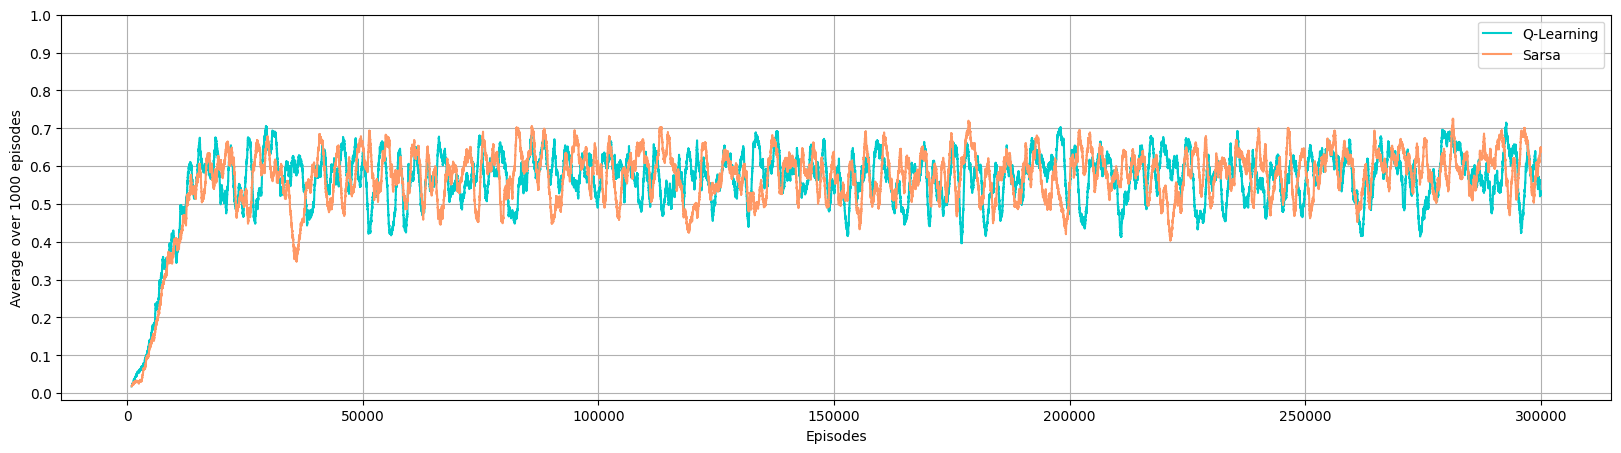

<Figure size 640x480 with 0 Axes>

In [69]:
plt.figure(figsize=(20, 5))
plt.plot(np.arange(len(total_reward_1_qlearning)), average_y_1_ql, color='#00CCCC', label='Q-Learning')
plt.plot(np.arange(len(total_reward_1_sarsa)), average_y_1_sa, color='#FF9966', label='Sarsa')
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.show()
plt.savefig("Frozenlake.png")

### FrozenLake8x8-v1

In [70]:
window = 1000
average_y_2_ql = []
average_y_2_sa = []
for ind in range(len(total_reward_2_qlearning) - window + 1):
    average_y_2_ql.append(np.mean(total_reward_2_qlearning[ind:ind+window]))
for ind in range(len(total_reward_2_sarsa) - window + 1):
    average_y_2_sa.append(np.mean(total_reward_2_sarsa[ind:ind+window]))

In [71]:
for ind in range(window - 1):
    average_y_2_ql.insert(0, np.nan)
    average_y_2_sa.insert(0, np.nan)

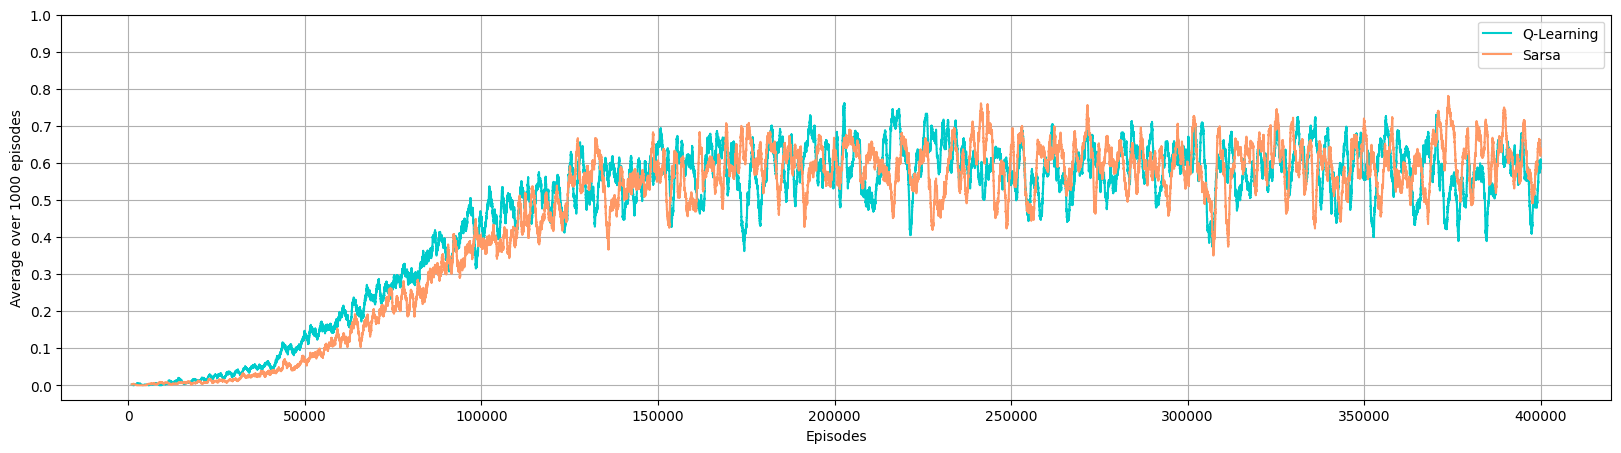

<Figure size 640x480 with 0 Axes>

In [72]:
plt.figure(figsize=(20, 5))
plt.plot(np.arange(len(total_reward_2_qlearning)), average_y_2_ql, color='#00CCCC', label='Q-Learning')
plt.plot(np.arange(len(total_reward_2_sarsa)), average_y_2_sa, color='#FF9966', label='Sarsa')
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.show()
plt.savefig("Frozenlake8x8.png")

### Taxi-v3

In [73]:
window = 300
average_y_3_ql = []
average_y_3_sa = []
for ind in range(len(total_reward_3_qlearning) - window + 1):
    average_y_3_ql.append(np.mean(total_reward_3_qlearning[ind:ind+window]))
for ind in range(len(total_reward_3_sarsa) - window + 1):
    average_y_3_sa.append(np.mean(total_reward_3_sarsa[ind:ind+window]))

In [74]:
for ind in range(window - 1):
    average_y_3_ql.insert(0, np.nan)
    average_y_3_sa.insert(0, np.nan)

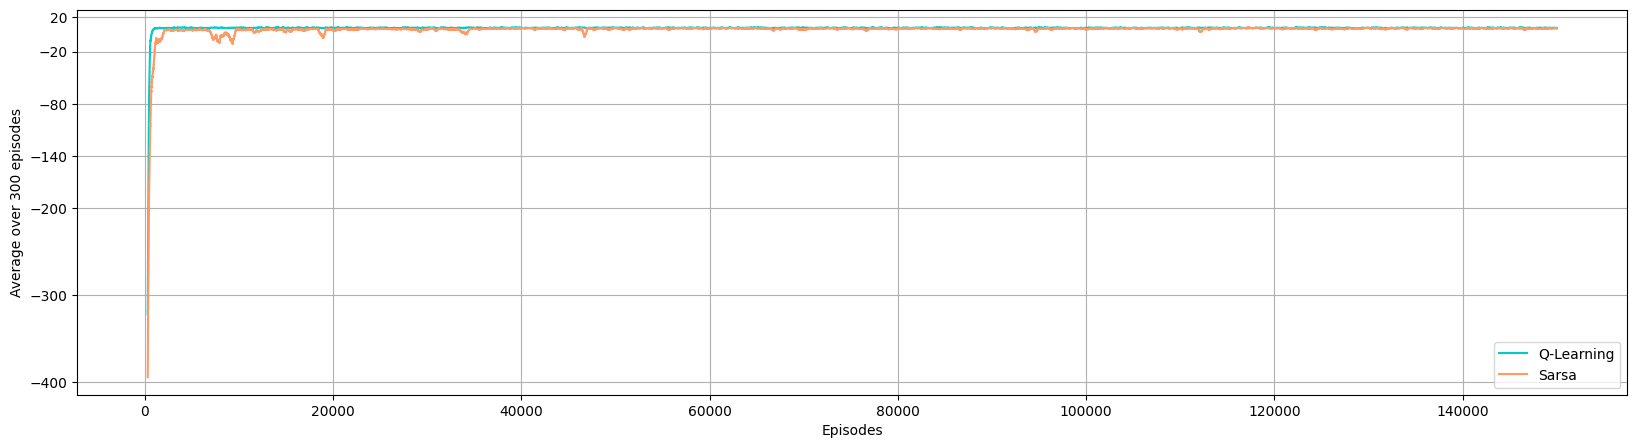

<Figure size 640x480 with 0 Axes>

In [80]:
plt.figure(figsize=(20, 5))
plt.plot(np.arange(len(total_reward_3_qlearning)), average_y_3_ql, color='#00CCCC', label='Q-Learning')
plt.plot(np.arange(len(total_reward_3_sarsa)), average_y_3_sa, color='#FF9966', label='Sarsa')
plt.yticks([-400, -300, -200, -140, -80, -20, 20])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.show()
plt.savefig("Taxi.png")

# Conclusion

### Characteristics of Sarsa and Q-learning

#### Sarsa
- Sarsa's learning process involves utilizing the current state, action, and reward to update the Q-value function for the next action.
- This reliance on the next action can lead to a slower initial learning phase, especially when the exploration rate is small.
- During this initial period, Sarsa may spend more time exploring suboptimal actions, hindering its ability to quickly converge towards the optimal policy.

#### Q-learning
- Q-learning directly updates the Q-value function based on the optimal value, bypassing the need to consider the next action.
- This direct approach allows Q-learning to more efficiently identify and exploit optimal actions, leading to faster initial learning.

### Visualizing the Difference

#### Graph 1: FrozenLake-v1 and Graph 2: FrozenLake8x8-v1
- Sarsa and Q-learning exhibit comparable initial performance, with intertwined curves and periodic fluctuations.
- Both algorithms demonstrate a steep initial learning curve, followed by a stabilized performance with occasional dips and peaks due to the stochastic nature of the environments.

#### Graph 3: Taxi-v3
- Owing to the more deterministic nature of the TaxiV3 environment, Q-learning exhibits faster learning and better convergence compared to Sarsa.
- Q-learning directly updates the Q-value function based on the optimal value, bypassing the need to consider the next action.
- Sarsa's reliance on the next action leads to slower initial learning.

By examining these observations, it becomes clear that the inherent characteristics of Sarsa and Q-learning significantly impact their initial learning behaviors, with Q-learning generally exhibiting a faster learning pace in the early stages of training.